<a href="https://colab.research.google.com/github/brahimje/Stock_Scraping_Python/blob/main/Extracting_Stock_Data_Using_Python_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

For this project, I will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. My job is to extract financial data like `historical share` `price` and `quarterly revenue` reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data I will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are *Tesla, Amazon, AMD, and GameStop*.

**Dashboard Analytics Displayed**

A dashboard often provides a view of key performance indicators in a clear way. Analyzing a data set and extracting key performance indicators will be practiced. Prompts will be used to support learning in accessing and displaying data in dashboards. Learning how to display key performance indicators on a dashboard will be included in this assignment. We will be using **`Plotly`** in this project for data visualization.

**Watson Studio**

Watson Studio, a component of IBM Cloud Pak for Data, is a suite of tools and a collaborative environment for data scientists, data analysts, AI and machine learning engineers and domain experts to develop and deploy your projects.

# Stock shares

A company's stock share is a piece of the company; more precisely:



***
A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." 

***

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,
the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. In this lab, you will use the  y-finance API to obtain the stock ticker and extract information about the stock.

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss. Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

My job is to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the `yfinance` library, it allows us to extract data for stocks returning data in a `pandas` dataframe.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
    </ul>
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67

In [3]:
import yfinance as yf
import pandas as pd

# Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [4]:
apple = yf.Ticker('AAPL')

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01).


### Stock Info

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [ ]:
apple_info = apple.info
apple_info

In [6]:
apple_info['country']

'United States'

In [7]:
# Get history of price in max period (1d, 1mo, 1y ...)
apple_share_price_data = apple.history(period='max')

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


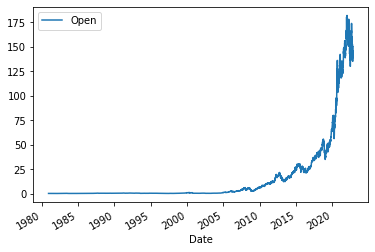

In [10]:
# Reset the index of the DataFrame with the reset_index function.
#set the inplace paramter to True so the change takes place to the DataFrame itself.
apple_share_price_data.reset_index(inplace=True)

# plot the Open price against the Date
apple_share_price_data.plot(x='Date', y='Open')

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [11]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
2022-08-05    0.230000
Name: Dividends, Length: 76, dtype: float64

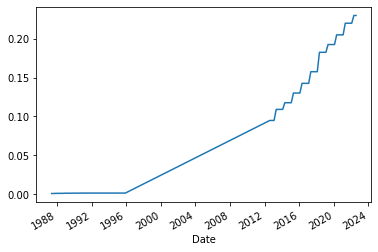

In [12]:
apple.dividends.plot()